In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv')
df.drop('Unnamed: 0', axis=1, inplace=True) # drop csv index column
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df.isnull().sum() # check for nulls (Riley's first step)

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [4]:
df.info() # check datatypes and stuff

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [5]:
df.describe() # learn some stuff about the data

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


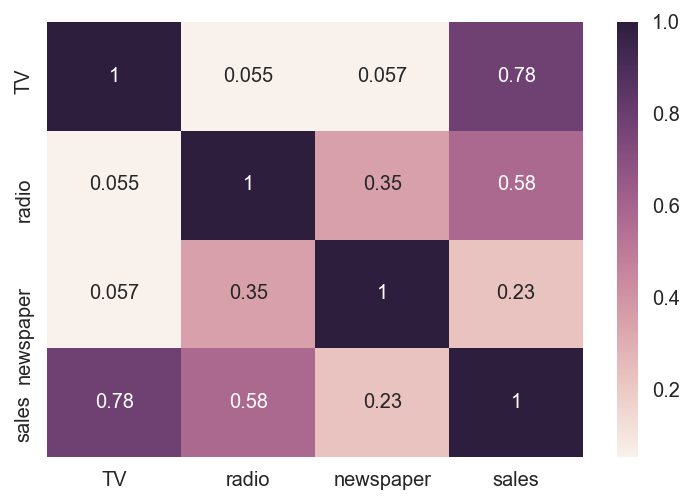

In [6]:
sns.heatmap(df.corr(), annot=True); # look for patterns

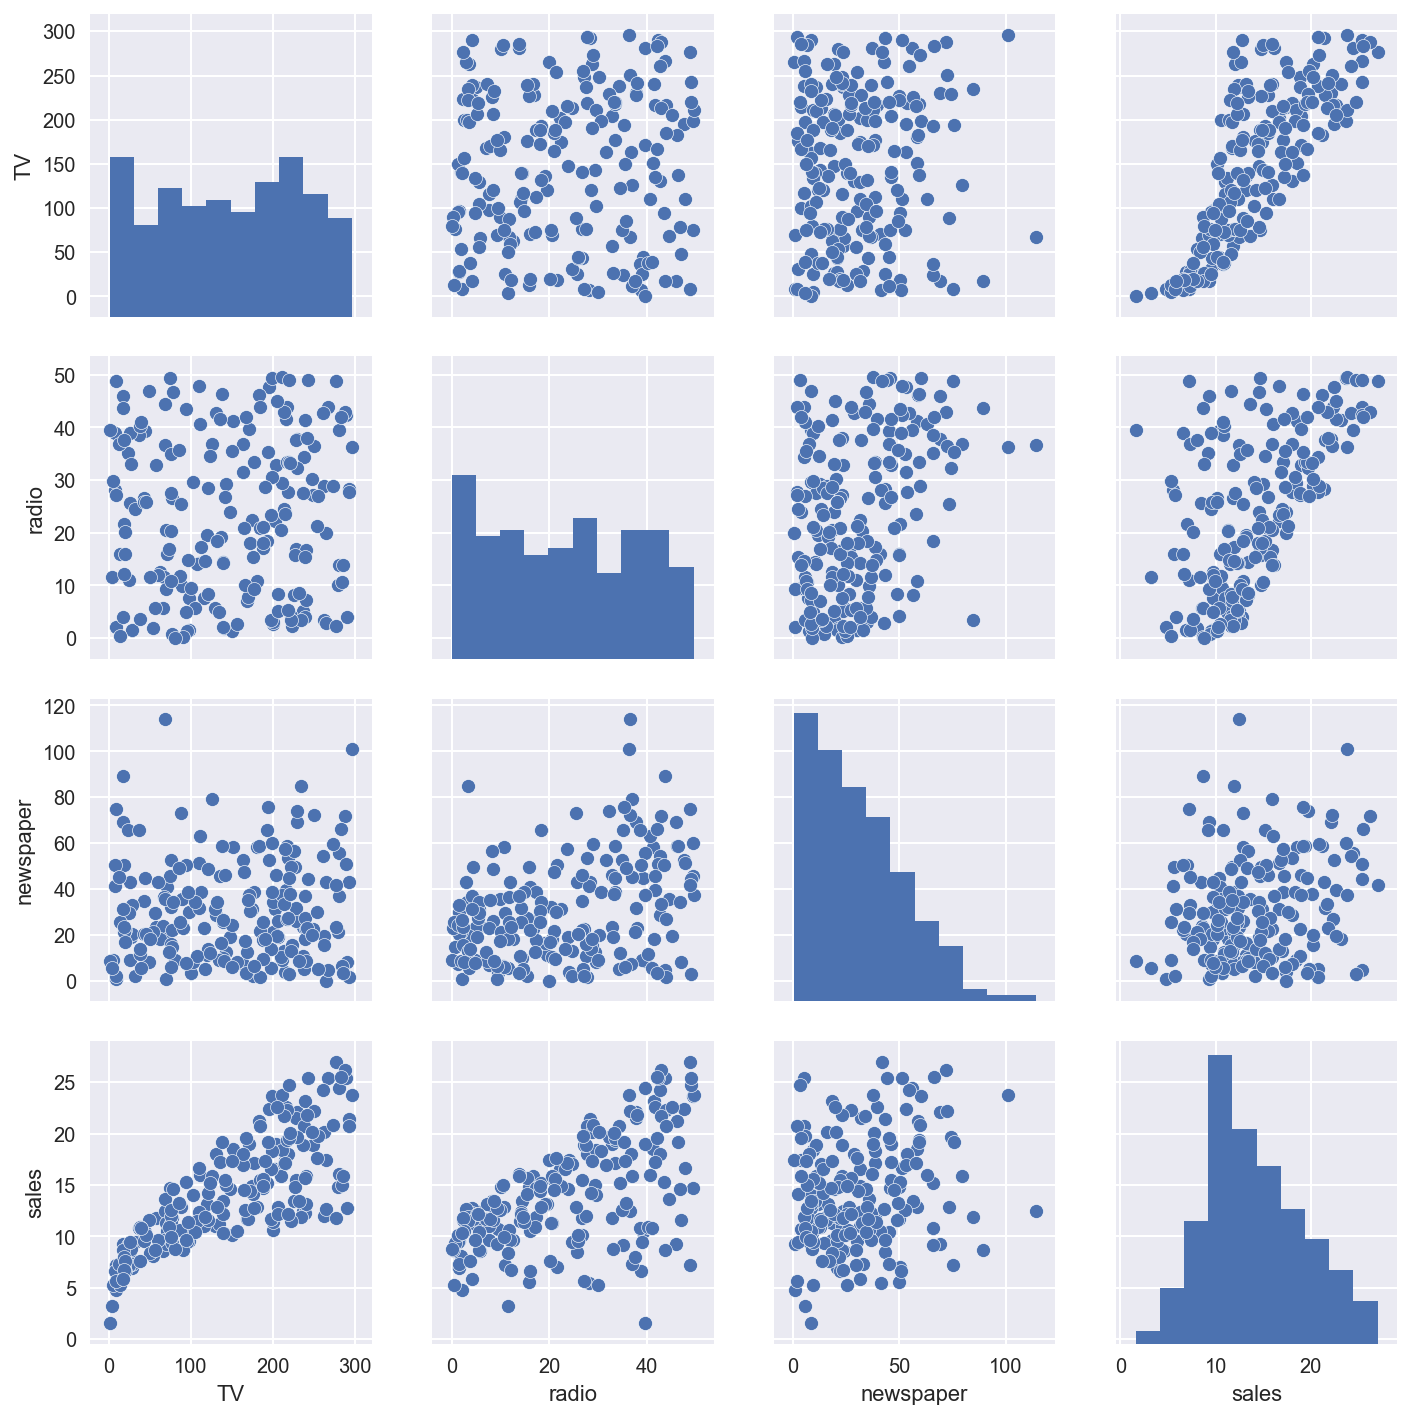

In [7]:
sns.pairplot(df); # More visualizations for ease of analysis

In [8]:
features = ['TV', 'radio', 'newspaper']
X = df[features]
Y = df['sales']

In [9]:
lr = LinearRegression()
lr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
lr.score(X, Y)

0.8972106381789521

In [11]:
# Interactions terms allow us to see how two variables affect one another, and their combined effect on the whole
# An example of this would be synergy between marketing channels
df['TV + radio'] = df['TV'] * df['radio'] # logical 'and' is multiplication
df.head()

,TV,radio,newspaper,sales,TV + radio
0,230.1,37.8,69.2,22.1,8697.78
1,44.5,39.3,45.1,10.4,1748.85
2,17.2,45.9,69.3,9.3,789.48
3,151.5,41.3,58.5,18.5,6256.95
4,180.8,10.8,58.4,12.9,1952.64


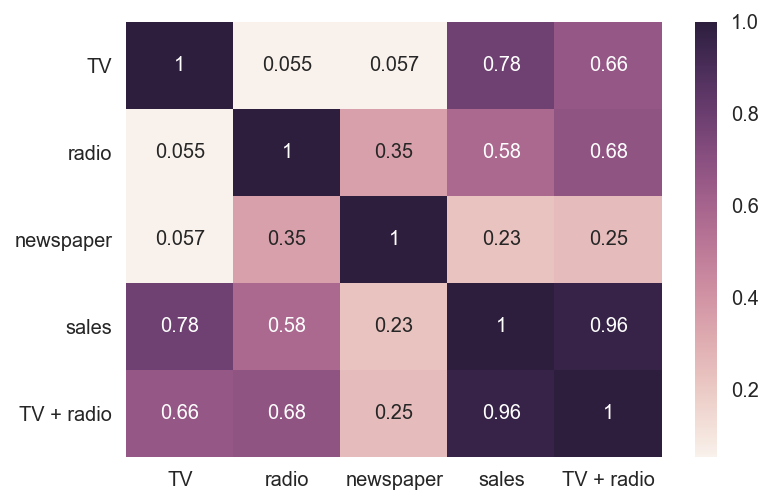

In [12]:
#reexamine heatmaps and pairplots
sns.heatmap(df.corr(), annot=True);

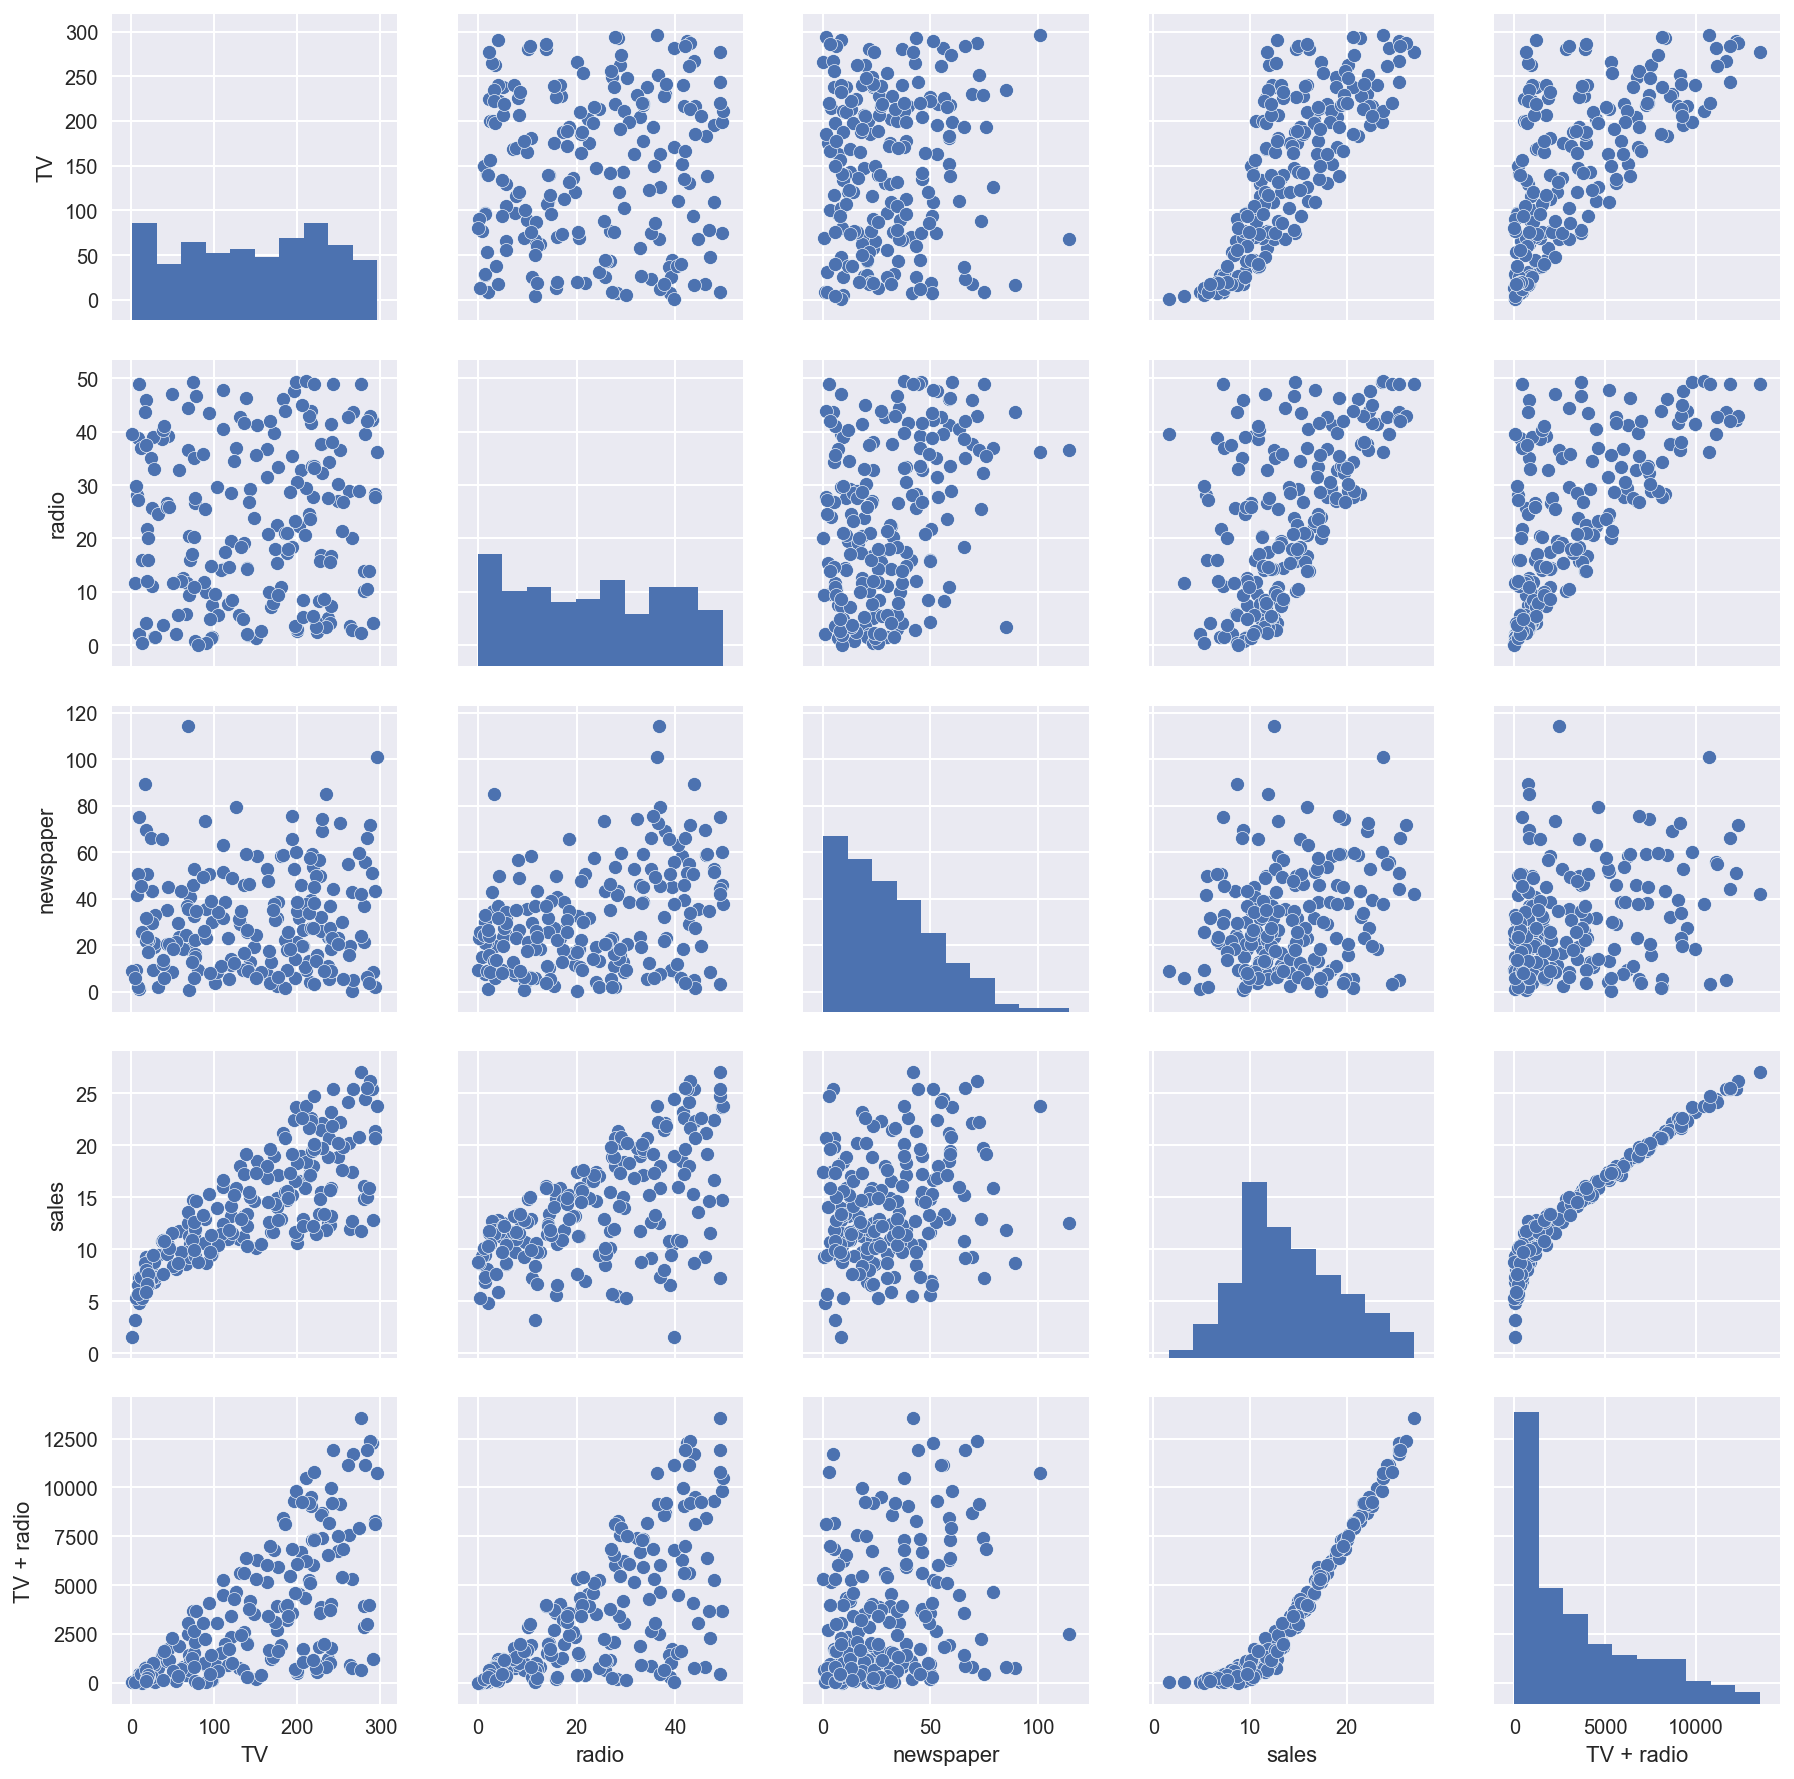

In [13]:
sns.pairplot(df);

In [14]:
# See if marketing is full of shit (it turns out that they are not!)
features = ['TV', 'radio', 'newspaper', 'TV + radio']
X = df[features]
Y = df['sales']
lr.fit(X, Y)
lr.score(X, Y)

0.9678222434748514

##### How do we check interaction term correlations at scale? Polynomial features. That's how.

In [15]:
# Reset features to only include independent terms
features = ['TV', 'radio', 'newspaper']
X = df[features]

In [16]:
poly = PolynomialFeatures(include_bias=False) # What?
X_poly = poly.fit_transform(X)
X_poly.shape

(200, 9)

In [17]:
# Get (row?/column?) names
poly.get_feature_names(features)

['TV',
 'radio',
 'newspaper',
 'TV^2',
 'TV radio',
 'TV newspaper',
 'radio^2',
 'radio newspaper',
 'newspaper^2']

In [18]:
lr.fit(X_poly, Y)
lr.score(X_poly, Y) # Overfit? Ovefit.

0.9865057435307856

##### If you have a model that requires gradient descent or deals with Euclidean distance, you need to scale your data

In [19]:
# Manual scaling - subtract mean from column (mean of zero)
((df['TV'] - df['TV'].mean()) / df['TV'].std()).head() # Essentially a column a z-scores

0    0.967425
1   -1.194379
2   -1.512360
3    0.051919
4    0.393196
Name: TV, dtype: float64

In [20]:
# Using library
ss = StandardScaler()

In [21]:
ss.fit(X)
X_scaled = ss.transform(X)
lr.fit(X_scaled, Y)
lr.score(X_scaled, Y)

0.8972106381789521

### Dummying categorical data

In [22]:
df = pd.read_csv('forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [23]:
with_dummies = pd.get_dummies(df, columns=['X', 'Y', 'month', 'day'], drop_first=True)

In [24]:
features = [col for col in with_dummies.columns if col != 'area']
X = with_dummies[features]
Y = with_dummies['area']

In [25]:
lr.fit(X, Y)
lr.score(X, Y)

0.06781820147087203

# On to the afternoon lecture

In [26]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [27]:
df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [28]:
features = ['TV', 'radio', 'newspaper']
X = df[features]
Y = df['sales']

In [29]:
# We will split the set into a training and a test set to combat overfitting
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

In [30]:
# Train with training set
lr.fit(X_train, Y_train)
lr.score(X_train, Y_train)

0.8966445527601498

In [31]:
# Test against test set
lr.score(X_test, Y_test)

0.8935163320163657

In [32]:
predictions = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(Y_test, predictions)

0.8935163320163657

In [33]:
submission = X_test.copy()

In [34]:
submission['Id'] = submission.index
submission['Prediction'] = predictions
submission[['Id', 'Prediction']].head()

,Id,Prediction
95,95,16.383482
15,15,20.924350
30,30,21.614954
158,158,10.490700
128,128,22.176905


In [35]:
# Library kfold with 5 folds
cross_val_score(LinearRegression(), X, Y, cv=5)

array([0.87865198, 0.91763212, 0.92933032, 0.81443904, 0.89547829])

In [36]:
# Manual kfold
kf = KFold()
for train, test in kf.split(X, Y):
    X_train_fold = X.loc[train, :]
    X_test_fold = X.loc[test, :]
    Y_train_fold = Y[train]
    Y_test_fold = Y[test]
    
    lr_fold = LinearRegression()
    lr_fold.fit(X_train_fold, Y_train_fold)
    print(lr_fold.score(X_test_fold, Y_test_fold))

0.9043808901338748
0.8653600912707698
0.905198395939023


# Ideal Workflow

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

In [38]:
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [39]:
cross_val_score(LinearRegression(), X_train_scaled, Y_train).mean()

0.8836222997466793

In [40]:
lr = LinearRegression()
lr.fit(X_train_scaled, Y_train)
lr.score(X_train_scaled, Y_train)

0.8966445527601498

In [41]:
lr.score(X_test_scaled, Y_test)

0.8935163320163659

In [42]:
(X_train['TV'] - X_train['TV'].mean()) / X_train['TV'].std()

114   -0.878487
173    0.181460
5     -1.695186
126   -1.705762
117   -0.899639
73    -0.276832
140   -0.934892
98     1.606865
172   -1.567100
96     0.524591
169    1.543409
97     0.375353
31    -0.470724
12    -1.517745
35     1.618616
119   -1.569450
42     1.652694
189   -1.577676
90    -0.219252
136   -1.496593
51    -0.617613
127   -0.854985
162    0.416482
41     0.282519
118   -0.320311
113    0.665604
26    -0.118192
139    0.375353
100    0.816018
111    1.042814
         ...   
48     0.872423
88    -0.759801
21     0.992284
57    -0.196924
160    0.229639
192   -1.595302
129   -1.097057
37    -0.919615
157   -0.037110
193    0.162658
1     -1.274498
52     0.745512
149   -1.272148
130   -1.789195
151   -0.375541
103    0.410606
99    -0.208676
116   -0.161671
87    -0.496577
74     0.710258
121   -1.576500
199    0.930003
20     0.769014
188    1.563386
71    -0.507153
106   -1.503644
14     0.600973
92     0.760788
179    0.148557
102    1.495230
Name: TV, Length: 150, d